# M2608.001300 기계학습 기초 및 전기정보 응용<br> Assignment 2: Support Vector Machines

## Setup
Check that Python 3.5 or later is installed (although Python 2.x may work, it is deprecated so we strongly recommend you use Python 3 instead), as well as Scikit-Learn 0.20 or later is installed.

In [1]:
# Python >=3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn >=0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

## Problem 1. Large margin classification
TODO: sklearn.svm library의 SVC 클래스와 SVC의 fit method를 이용하세요. SVC의 kernel로 Linear kernel을 사용하세요.

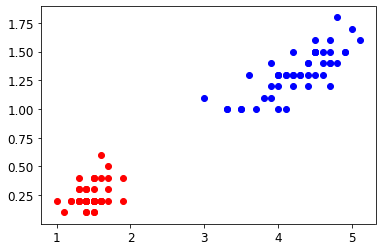

In [2]:
from sklearn.svm import SVC
from sklearn import datasets

iris = datasets.load_iris()
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = iris["target"]

setosa_or_versicolor = (y == 0) | (y == 1)
X = X[setosa_or_versicolor]
y = y[setosa_or_versicolor]


# SVM Classifier model
#################### TODO ####################
svm_clf = SVC(kernel='linear')
svm_clf.fit(X, y)

plt.scatter(X[y==0][:,0], X[y==0][:,1], color='red')
plt.scatter(X[y==1][:,0], X[y==1][:,1], color='blue')

##############################################

[1.1 0.7] -3.2799999713897705


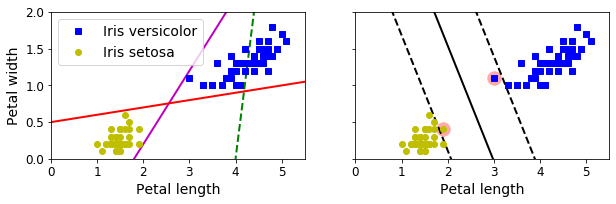

In [3]:
# Bad models
x0 = np.linspace(0, 5.5, 200)
pred_1 = 5*x0 - 20
pred_2 = x0 - 1.8
pred_3 = 0.1 * x0 + 0.5

def plot_svc_decision_boundary(svm_clf, xmin, xmax):
    w = svm_clf.coef_[0]
    b = svm_clf.intercept_[0]
    print(w, b)

    # At the decision boundary, w0*x0 + w1*x1 + b = 0
    # => x1 = -w0/w1 * x0 - b/w1
    x0 = np.linspace(xmin, xmax, 200)
    decision_boundary = -w[0]/w[1] * x0 - b/w[1]

    margin = 1/w[1]
    gutter_up = decision_boundary + margin
    gutter_down = decision_boundary - margin

    svs = svm_clf.support_vectors_
    plt.scatter(svs[:, 0], svs[:, 1], s=180, facecolors='#FFAAAA')
    plt.plot(x0, decision_boundary, "k-", linewidth=2)
    plt.plot(x0, gutter_up, "k--", linewidth=2)
    plt.plot(x0, gutter_down, "k--", linewidth=2)

fig, axes = plt.subplots(ncols=2, figsize=(10,2.7), sharey=True)

plt.sca(axes[0])
plt.plot(x0, pred_1, "g--", linewidth=2)
plt.plot(x0, pred_2, "m-", linewidth=2)
plt.plot(x0, pred_3, "r-", linewidth=2)
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris versicolor")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris setosa")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 5.5, 0, 2])

plt.sca(axes[1])
plot_svc_decision_boundary(svm_clf, 0, 5.5)
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo")
plt.xlabel("Petal length", fontsize=14)
plt.axis([0, 5.5, 0, 2])

plt.show()

## Problem 2. Sensitivity to outliers
TODO: X_outliers 값을 바꿔가며 실험해보세요.

[2.8559135  8.56781863] -16.99262620355056


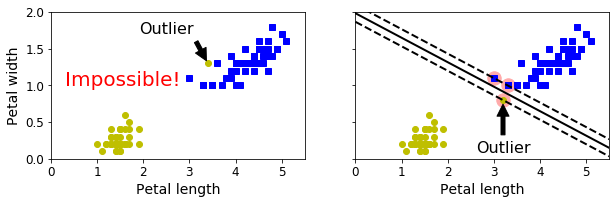

[0.13096612 4.44338648] -3.8758138402074698


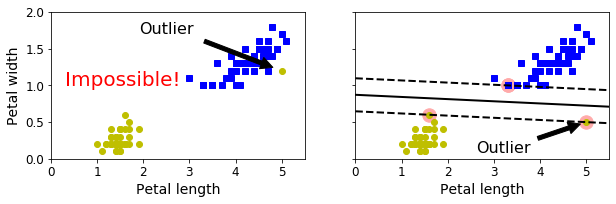

[1.59999961 0.7999998 ] -4.6799987811282255


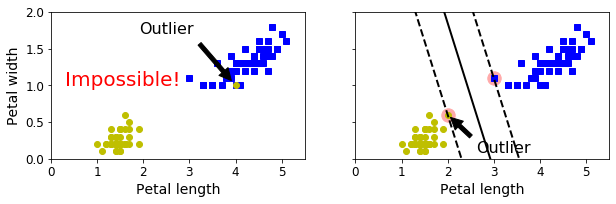

[0.46532113 3.02458357] -3.559557720483316


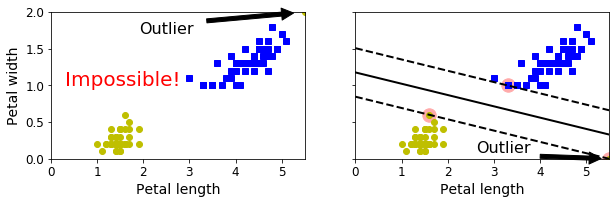

[ 67.22805793 201.80671668] -422.6644674289849


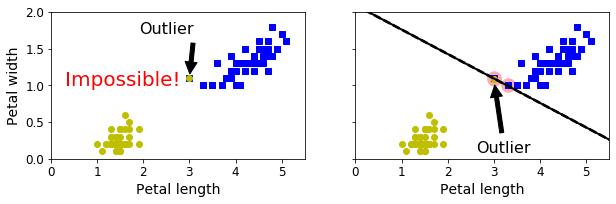

In [4]:
def plot_outliers(X_outliers):
    y_outliers = np.array([0, 0])
    Xo1 = np.concatenate([X, X_outliers[:1]], axis=0)
    yo1 = np.concatenate([y, y_outliers[:1]], axis=0)
    Xo2 = np.concatenate([X, X_outliers[1:]], axis=0)
    yo2 = np.concatenate([y, y_outliers[1:]], axis=0)

    svm_clf2 = SVC(kernel="linear", C=10**9)
    svm_clf2.fit(Xo2, yo2)

    fig, axes = plt.subplots(ncols=2, figsize=(10,2.7), sharey=True)

    plt.sca(axes[0])
    plt.plot(Xo1[:, 0][yo1==1], Xo1[:, 1][yo1==1], "bs")
    plt.plot(Xo1[:, 0][yo1==0], Xo1[:, 1][yo1==0], "yo")
    plt.text(0.3, 1.0, "Impossible!", fontsize=20, color="red")
    plt.xlabel("Petal length", fontsize=14)
    plt.ylabel("Petal width", fontsize=14)
    plt.annotate("Outlier",
                 xy=(X_outliers[0][0], X_outliers[0][1]),
                 xytext=(2.5, 1.7),
                 ha="center",
                 arrowprops=dict(facecolor='black', shrink=0.1),
                 fontsize=16,
                )
    plt.axis([0, 5.5, 0, 2])

    plt.sca(axes[1])
    plt.plot(Xo2[:, 0][yo2==1], Xo2[:, 1][yo2==1], "bs")
    plt.plot(Xo2[:, 0][yo2==0], Xo2[:, 1][yo2==0], "yo")
    plot_svc_decision_boundary(svm_clf2, 0, 5.5)
    plt.xlabel("Petal length", fontsize=14)
    plt.annotate("Outlier",
                 xy=(X_outliers[1][0], X_outliers[1][1]),
                 xytext=(3.2, 0.08),
                 ha="center",
                 arrowprops=dict(facecolor='black', shrink=0.1),
                 fontsize=16,
                )
    plt.axis([0, 5.5, 0, 2])

    plt.show()

#################### TODO ####################
plot_outliers(np.array([[3.4, 1.3], [3.2, 0.8]]))
plot_outliers(np.array([[5, 1.2], [5, 0.5]]))
plot_outliers(np.array([[4, 1], [2, 0.6]]))
plot_outliers(np.array([[5.5, 2.0], [5.5, 0]]))
plot_outliers(np.array([[3, 1.1], [3, 1.09]]))
##############################################

## Problem 3. Large margin vs margin violations

In [5]:
import numpy as np
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

iris = datasets.load_iris()
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = (iris["target"] == 2).astype(np.float64)  # Iris virginica

svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("linear_svc", LinearSVC(C=1, loss="hinge", random_state=42)),
    ])

svm_clf.fit(X, y)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('linear_svc',
                 LinearSVC(C=1, class_weight=None, dual=True,
                           fit_intercept=True, intercept_scaling=1,
                           loss='hinge', max_iter=1000, multi_class='ovr',
                           penalty='l2', random_state=42, tol=0.0001,
                           verbose=0))],
         verbose=False)

In [6]:
svm_clf.predict([[5.5, 1.7]])

array([1.])

Now let's generate the graph comparing different regularization settings:

TODO: svm_clf1 과 svm_clf2 의 C 값을 바꿔가며 실험해보세요.

In [7]:
def plot_margin_violations(svm_clf1, svm_clf2):
    scaler = StandardScaler()
    scaled_svm_clf1 = Pipeline([
            ("scaler", scaler),
            ("linear_svc", svm_clf1),
        ])
    scaled_svm_clf2 = Pipeline([
            ("scaler", scaler),
            ("linear_svc", svm_clf2),
        ])

    scaled_svm_clf1.fit(X, y)
    scaled_svm_clf2.fit(X, y)
    
    # Convert to unscaled parameters
    b1 = svm_clf1.decision_function([-scaler.mean_ / scaler.scale_])
    b2 = svm_clf2.decision_function([-scaler.mean_ / scaler.scale_])
    w1 = svm_clf1.coef_[0] / scaler.scale_
    w2 = svm_clf2.coef_[0] / scaler.scale_
    svm_clf1.intercept_ = np.array([b1])
    svm_clf2.intercept_ = np.array([b2])
    svm_clf1.coef_ = np.array([w1])
    svm_clf2.coef_ = np.array([w2])

    # Find support vectors (LinearSVC does not do this automatically)
    t = y * 2 - 1
    support_vectors_idx1 = (t * (X.dot(w1) + b1) < 1).ravel()
    support_vectors_idx2 = (t * (X.dot(w2) + b2) < 1).ravel()
    svm_clf1.support_vectors_ = X[support_vectors_idx1]
    svm_clf2.support_vectors_ = X[support_vectors_idx2]

    fig, axes = plt.subplots(ncols=2, figsize=(10,2.7), sharey=True)

    plt.sca(axes[0])
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^", label="Iris virginica")
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs", label="Iris versicolor")
    plot_svc_decision_boundary(svm_clf1, 4, 5.9)
    plt.xlabel("Petal length", fontsize=14)
    plt.ylabel("Petal width", fontsize=14)
    plt.legend(loc="upper left", fontsize=14)
    plt.title("$C = {}$".format(svm_clf1.C), fontsize=16)
    plt.axis([4, 5.9, 0.8, 2.8])

    plt.sca(axes[1])
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
    plot_svc_decision_boundary(svm_clf2, 4, 5.99)
    plt.xlabel("Petal length", fontsize=14)
    plt.title("$C = {}$".format(svm_clf2.C), fontsize=16)
    plt.axis([4, 5.9, 0.8, 2.8])

    plt.show()

[3.9998406  7.99970047] [-32.59869574]
[3.99984981 7.99968788] [-32.59871726]


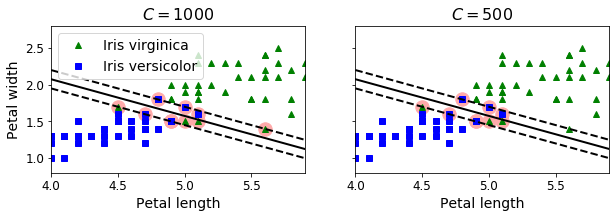

[3.63650373 6.36400853] [-28.27403284]
[2.75873644 4.8278226 ] [-21.20779516]


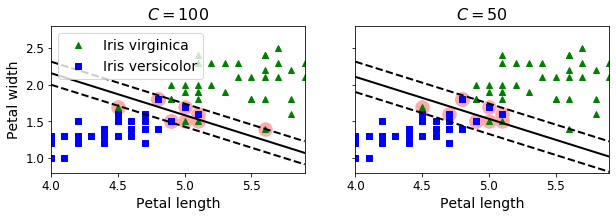

[1.82092657 4.84598045] [-16.64530501]
[1.24859957 4.16919863] [-12.87249603]


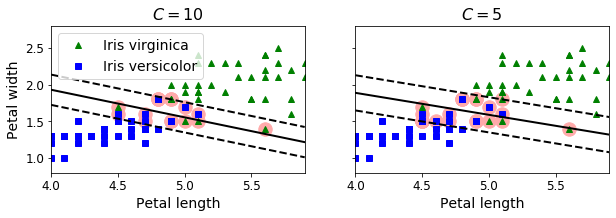

[0.9283666  3.14340194] [-9.76413982]
[0.77625114 2.53915161] [-7.93851912]


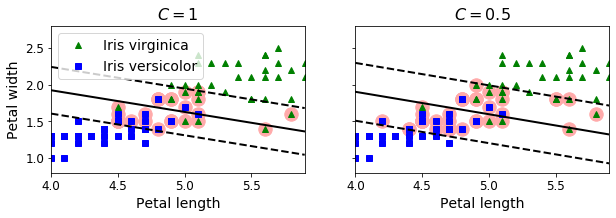

[0.45472042 1.46436569] [-4.57613027]
[0.32495125 1.13767445] [-3.30639774]


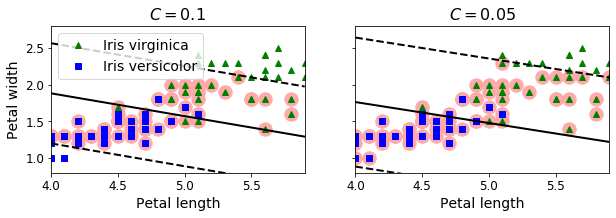

[0.20119511 0.56647843] [-1.53548769]
[0.18559058 0.47734906] [-1.38447247]


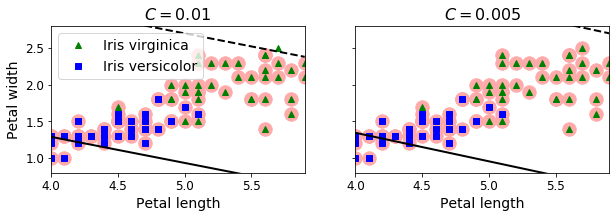

In [31]:
#################### TODO ####################
svm_clf1 = LinearSVC(C=1000, loss="hinge", random_state=42, max_iter=1e5)
svm_clf2 = LinearSVC(C=500, loss="hinge", random_state=42, max_iter=1e5)
plot_margin_violations(svm_clf1, svm_clf2)
svm_clf1 = LinearSVC(C=100, loss="hinge", random_state=42, max_iter=1e5)
svm_clf2 = LinearSVC(C=50, loss="hinge", random_state=42, max_iter=1e5)
plot_margin_violations(svm_clf1, svm_clf2)
svm_clf1 = LinearSVC(C=10, loss="hinge", random_state=42, max_iter=1e5)
svm_clf2 = LinearSVC(C=5, loss="hinge", random_state=42, max_iter=1e5)
plot_margin_violations(svm_clf1, svm_clf2)
svm_clf1 = LinearSVC(C=1, loss="hinge", random_state=42, max_iter=1e5)
svm_clf2 = LinearSVC(C=0.5, loss="hinge", random_state=42, max_iter=1e5)
plot_margin_violations(svm_clf1, svm_clf2)
svm_clf1 = LinearSVC(C=0.1, loss="hinge", random_state=42, max_iter=1e5)
svm_clf2 = LinearSVC(C=0.05, loss="hinge", random_state=42, max_iter=1e5)
plot_margin_violations(svm_clf1, svm_clf2)
svm_clf1 = LinearSVC(C=0.01, loss="hinge", random_state=42, max_iter=1e5)
svm_clf2 = LinearSVC(C=0.005, loss="hinge", random_state=42, max_iter=1e5)
plot_margin_violations(svm_clf1, svm_clf2)
##############################################

## Problem 4. Non-linear classification

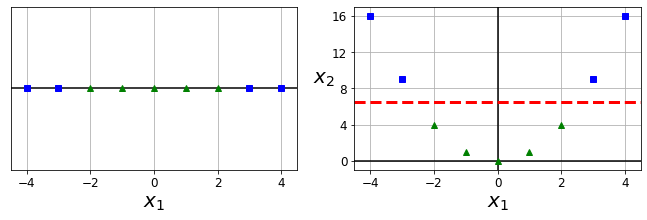

In [32]:
X1D = np.linspace(-4, 4, 9).reshape(-1, 1)
X2D = np.c_[X1D, X1D**2]
y = np.array([0, 0, 1, 1, 1, 1, 1, 0, 0])

plt.figure(figsize=(10, 3))

plt.subplot(121)
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.plot(X1D[:, 0][y==0], np.zeros(4), "bs")
plt.plot(X1D[:, 0][y==1], np.zeros(5), "g^")
plt.gca().get_yaxis().set_ticks([])
plt.xlabel(r"$x_1$", fontsize=20)
plt.axis([-4.5, 4.5, -0.2, 0.2])

plt.subplot(122)
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.plot(X2D[:, 0][y==0], X2D[:, 1][y==0], "bs")
plt.plot(X2D[:, 0][y==1], X2D[:, 1][y==1], "g^")
plt.xlabel(r"$x_1$", fontsize=20)
plt.ylabel(r"$x_2$  ", fontsize=20, rotation=0)
plt.gca().get_yaxis().set_ticks([0, 4, 8, 12, 16])
plt.plot([-4.5, 4.5], [6.5, 6.5], "r--", linewidth=3)
plt.axis([-4.5, 4.5, -1, 17])

plt.subplots_adjust(right=1)

plt.show()

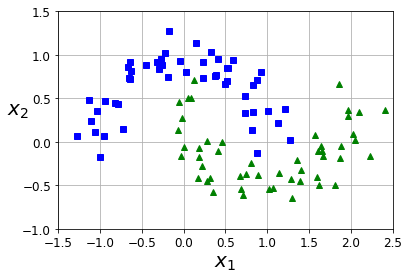

In [33]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=100, noise=0.15, random_state=42)

def plot_dataset(X, y, axes):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
    plt.axis(axes)
    plt.grid(True, which='both')
    plt.xlabel(r"$x_1$", fontsize=20)
    plt.ylabel(r"$x_2$", fontsize=20, rotation=0)

plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.show()

In [44]:
from sklearn.datasets import make_moons
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

polynomial_svm_clf = Pipeline([
        ("poly_features", PolynomialFeatures(degree=3)),
        ("scaler", StandardScaler()),
        ("svm_clf", LinearSVC(C=10, loss="hinge", random_state=42, max_iter=1e5))
    ])

polynomial_svm_clf.fit(X, y)

Pipeline(memory=None,
         steps=[('poly_features',
                 PolynomialFeatures(degree=3, include_bias=True,
                                    interaction_only=False, order='C')),
                ('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svm_clf',
                 LinearSVC(C=10, class_weight=None, dual=True,
                           fit_intercept=True, intercept_scaling=1,
                           loss='hinge', max_iter=100000.0, multi_class='ovr',
                           penalty='l2', random_state=42, tol=0.0001,
                           verbose=0))],
         verbose=False)

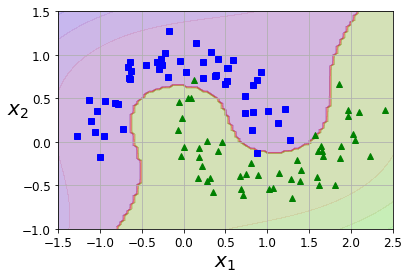

In [45]:
def plot_predictions(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    y_decision = clf.decision_function(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)

plot_predictions(polynomial_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])

plt.show()

## Problem 4-1. Polynomial kernel (Non-linear classification)
TODO_1: SVC의 kernel로 Polynomial kernel을 사용하고, degree 와 coef0 의 값을 바꿔가며 실험해보세요.

TODO_2: SVC의 kernel로 Polynomial kernel을 사용하고, degree 와 coef0 의 값을 바꿔가며 실험해보세요.

In [185]:
from sklearn.svm import SVC
def plot_poly_kernel(svcs, variant):
    poly_kernel_svm_clfs = []
    for svc in svcs:
        poly_kernel_svm_clfs.append(Pipeline([
                ("scaler", StandardScaler()),
                ("svm_clf", svc)
            ]))
    for poly_kernel_svm_clf in poly_kernel_svm_clfs:
        poly_kernel_svm_clf.fit(X, y)
    
    if variant == 'degree':
        invariants = 'C = {}, coef0 = {}'.format(svcs[0].C, svcs[0].coef0)
    if variant == 'coef0':
        invariants = 'C = {}, degree = {}'.format(svcs[0].C, svcs[0].degree)
    if variant == 'C':
        invariants = 'degree = {}, coef0 = {}'.format(svcs[0].degree, svcs[0].coef0)

    fig, axes = plt.subplots(ncols=len(svcs), figsize=(10.5, 4), sharey=True, constrained_layout=True)
    fig.suptitle('Varying {} (invariants: {})'.format(variant, invariants), fontsize=16)
    
    for i in range(len(svcs)):
        plt.sca(axes[i])
        plot_predictions(poly_kernel_svm_clfs[i], [-1.5, 2.45, -1, 1.5])
        plot_dataset(X, y, [-1.5, 2.4, -1, 1.5])
        if variant == 'degree':
            axes[i].set_title(r"$degree={}$".format(svcs[i].degree), fontsize=16)
        if variant == 'coef0':
            axes[i].set_title(r"$coef0={}$".format(svcs[i].coef0), fontsize=16)
        if variant == 'C':
            axes[i].set_title(r"$C={}$".format(svcs[i].C), fontsize=16)
        if i != 0:
            plt.ylabel("")
    plt.show()

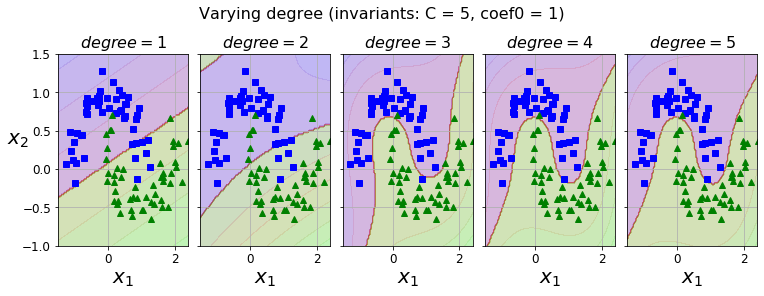

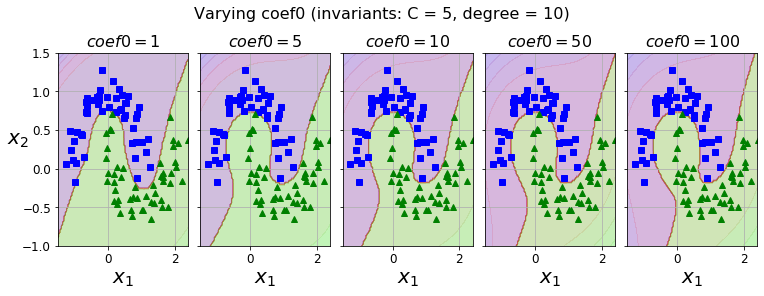

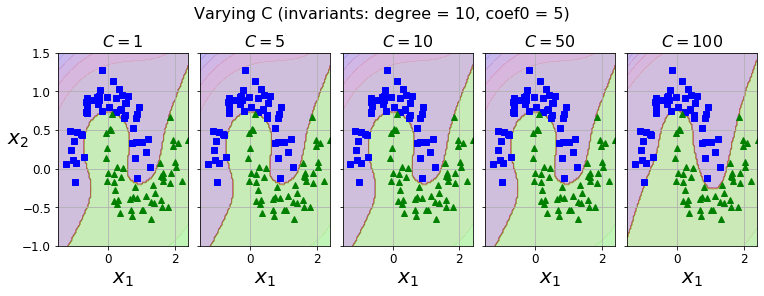

In [186]:
svcs = [SVC(kernel='poly', degree=1, coef0=1, C=5),
        SVC(kernel='poly', degree=2, coef0=1, C=5),
        SVC(kernel='poly', degree=3, coef0=1, C=5),
        SVC(kernel='poly', degree=4, coef0=1, C=5),
        SVC(kernel='poly', degree=5, coef0=1, C=5),]
plot_poly_kernel(svcs, 'degree')
svcs = [SVC(kernel='poly', degree=10, coef0=1, C=5),
        SVC(kernel='poly', degree=10, coef0=5, C=5),
        SVC(kernel='poly', degree=10, coef0=10, C=5),
        SVC(kernel='poly', degree=10, coef0=50, C=5),
        SVC(kernel='poly', degree=10, coef0=100, C=5),]
plot_poly_kernel(svcs, 'coef0')
svcs = [SVC(kernel='poly', degree=10, coef0=5, C=1),
        SVC(kernel='poly', degree=10, coef0=5, C=5),
        SVC(kernel='poly', degree=10, coef0=5, C=10),
        SVC(kernel='poly', degree=10, coef0=5, C=50),
        SVC(kernel='poly', degree=10, coef0=1, C=100),]
plot_poly_kernel(svcs, 'C')

## Problem 4-2. Gaussian RBF kernel (Non-linear classification)

In [ ]:
def gaussian_rbf(x, landmark, gamma):
    return np.exp(-gamma * np.linalg.norm(x - landmark, axis=1)**2)

gamma = 0.3

x1s = np.linspace(-4.5, 4.5, 200).reshape(-1, 1)
x2s = gaussian_rbf(x1s, -2, gamma)
x3s = gaussian_rbf(x1s, 1, gamma)

XK = np.c_[gaussian_rbf(X1D, -2, gamma), gaussian_rbf(X1D, 1, gamma)]
yk = np.array([0, 0, 1, 1, 1, 1, 1, 0, 0])

plt.figure(figsize=(10.5, 4))

plt.subplot(121)
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.scatter(x=[-2, 1], y=[0, 0], s=150, alpha=0.5, c="red")
plt.plot(X1D[:, 0][yk==0], np.zeros(4), "bs")
plt.plot(X1D[:, 0][yk==1], np.zeros(5), "g^")
plt.plot(x1s, x2s, "g--")
plt.plot(x1s, x3s, "b:")
plt.gca().get_yaxis().set_ticks([0, 0.25, 0.5, 0.75, 1])
plt.xlabel(r"$x_1$", fontsize=20)
plt.ylabel(r"Similarity", fontsize=14)
plt.annotate(r'$\mathbf{x}$',
             xy=(X1D[3, 0], 0),
             xytext=(-0.5, 0.20),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.1),
             fontsize=18,
            )
plt.text(-2, 0.9, "$x_2$", ha="center", fontsize=20)
plt.text(1, 0.9, "$x_3$", ha="center", fontsize=20)
plt.axis([-4.5, 4.5, -0.1, 1.1])

plt.subplot(122)
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.plot(XK[:, 0][yk==0], XK[:, 1][yk==0], "bs")
plt.plot(XK[:, 0][yk==1], XK[:, 1][yk==1], "g^")
plt.xlabel(r"$x_2$", fontsize=20)
plt.ylabel(r"$x_3$  ", fontsize=20, rotation=0)
plt.annotate(r'$\phi\left(\mathbf{x}\right)$',
             xy=(XK[3, 0], XK[3, 1]),
             xytext=(0.65, 0.50),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.1),
             fontsize=18,
            )
plt.plot([-0.1, 1.1], [0.57, -0.1], "r--", linewidth=3)
plt.axis([-0.1, 1.1, -0.1, 1.1])
    
plt.subplots_adjust(right=1)

plt.show()

In [ ]:
x1_example = X1D[3, 0]
for landmark in (-2, 1):
    k = gaussian_rbf(np.array([[x1_example]]), np.array([[landmark]]), gamma)
    print("Phi({}, {}) = {}".format(x1_example, landmark, k))

TODO_1: SVC의 kernel로 Gaussian RBF kernel을 사용하세요.

In [ ]:
#################### TODO_1 ####################
rbf_kernel_svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel=None, gamma=5, C=0.001))
    ])
rbf_kernel_svm_clf.fit(X, y)
################################################

TODO_2: gamma1, gamma2, C1, C2 값을 바꿔가며 실험해보세요.

In [ ]:
from sklearn.svm import SVC

#################### TODO_2 ####################
gamma1, gamma2 = 0.1, 5
C1, C2 = 0.001, 1000
################################################
hyperparams = (gamma1, C1), (gamma1, C2), (gamma2, C1), (gamma2, C2)

svm_clfs = []
for gamma, C in hyperparams:
    rbf_kernel_svm_clf = Pipeline([
            ("scaler", StandardScaler()),
            ("svm_clf", SVC(kernel="rbf", gamma=gamma, C=C))
        ])
    rbf_kernel_svm_clf.fit(X, y)
    svm_clfs.append(rbf_kernel_svm_clf)

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10.5, 7), sharex=True, sharey=True)

for i, svm_clf in enumerate(svm_clfs):
    plt.sca(axes[i // 2, i % 2])
    plot_predictions(svm_clf, [-1.5, 2.45, -1, 1.5])
    plot_dataset(X, y, [-1.5, 2.45, -1, 1.5])
    gamma, C = hyperparams[i]
    plt.title(r"$\gamma = {}, C = {}$".format(gamma, C), fontsize=16)
    if i in (0, 1):
        plt.xlabel("")
    if i in (1, 3):
        plt.ylabel("")

plt.show()

Copyright (C) Hands-On Machine Learning with Scikit-Learn and TensorFlow: Concepts, Tools, and Techniques to Build Intelligent Systems. Written by Aurélien Géron.